# Project1 - Crop Yield Prediction

### Vinith, Ramandeep, Yeji

dataset: https://www.kaggle.com/datasets/varshitanalluri/crop-price-prediction-dataset/data

### Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load the data

In [2]:
df = pd.read_csv("Crop_Yield_Prediction.csv")
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


### EDA exploration

In [3]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [4]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [6]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

#### histogram

In [7]:
df_numeric = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall', 'Yield']]

In [11]:
df_no_y = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]

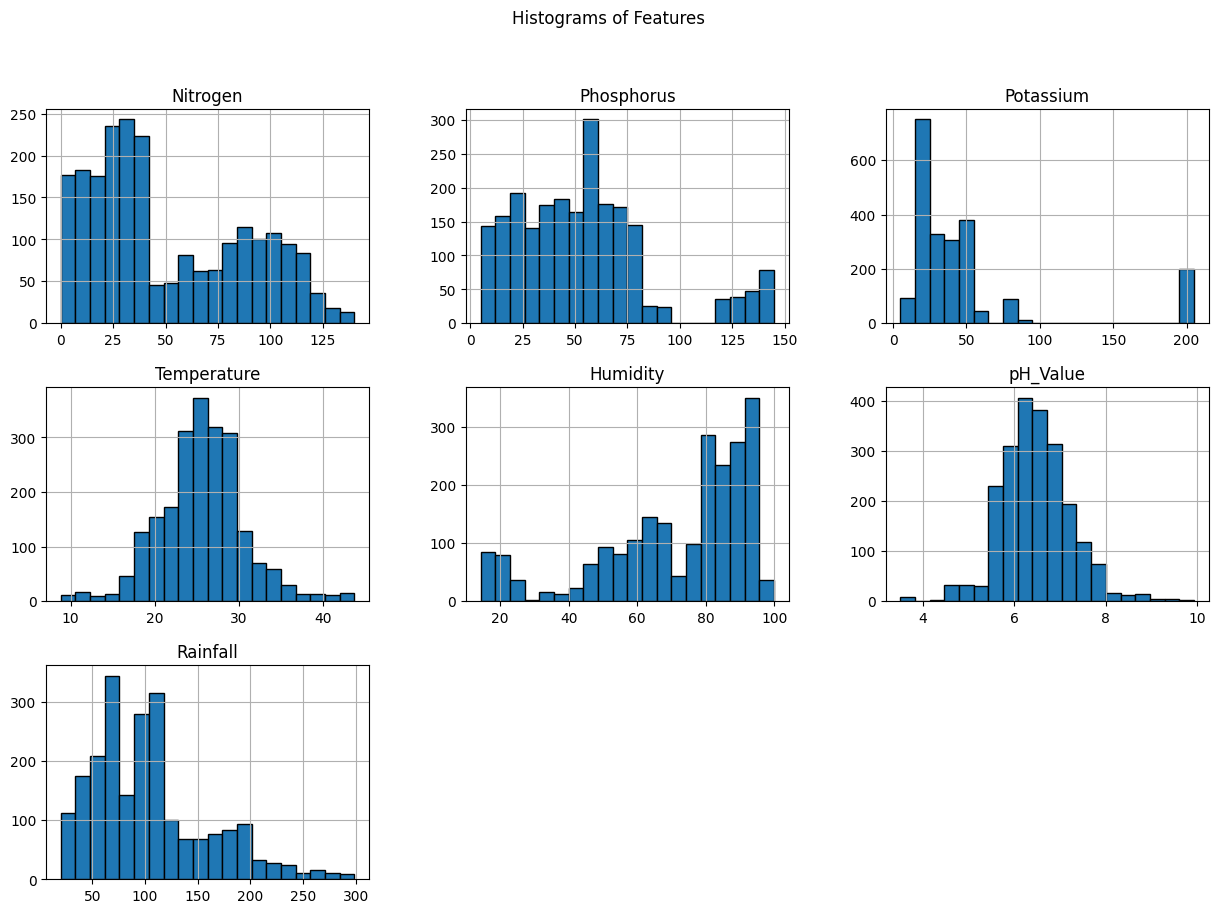

In [12]:
df_no_y.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

#### boxplot

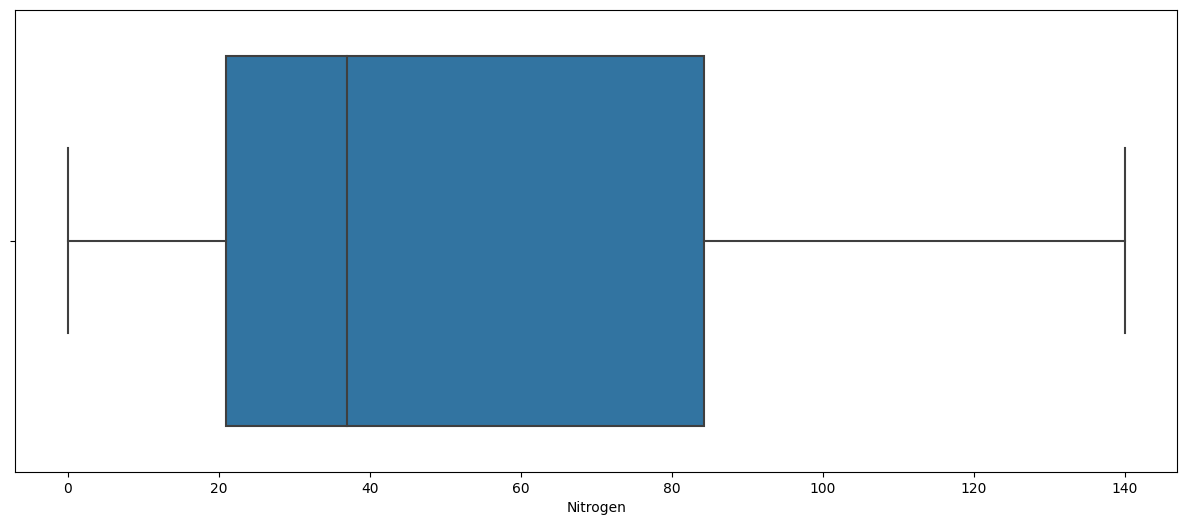

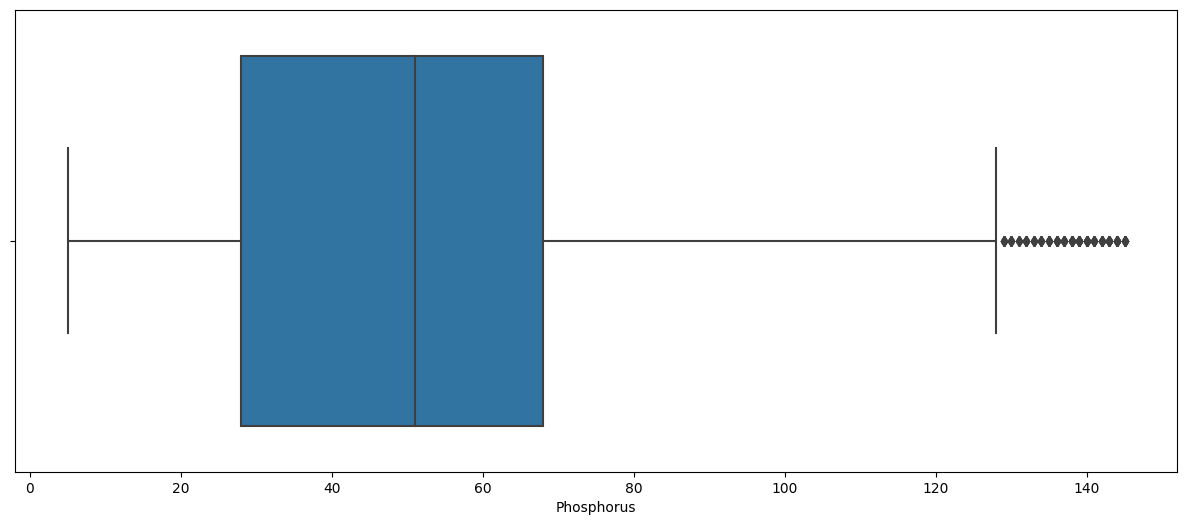

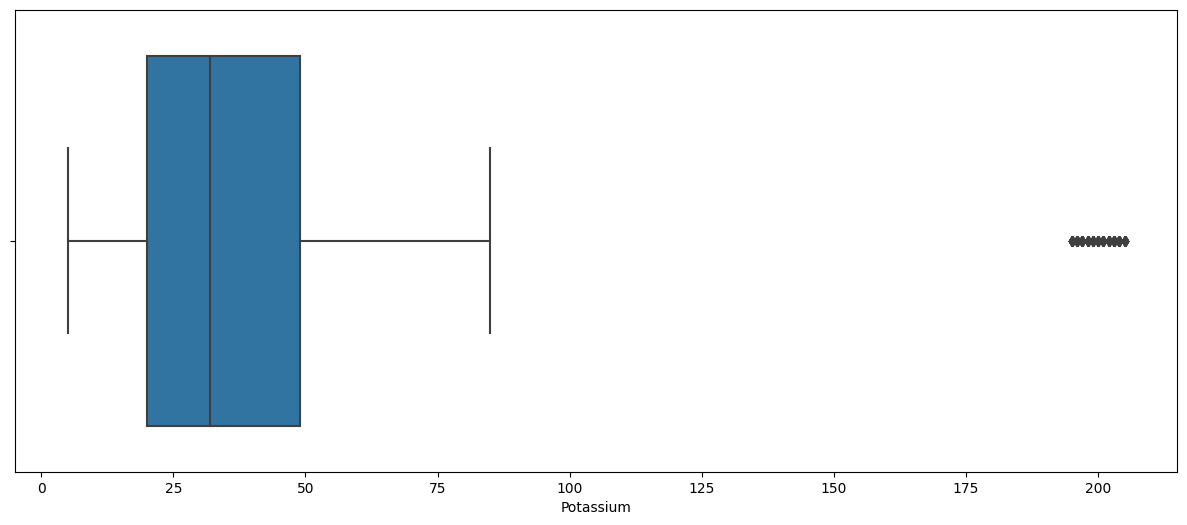

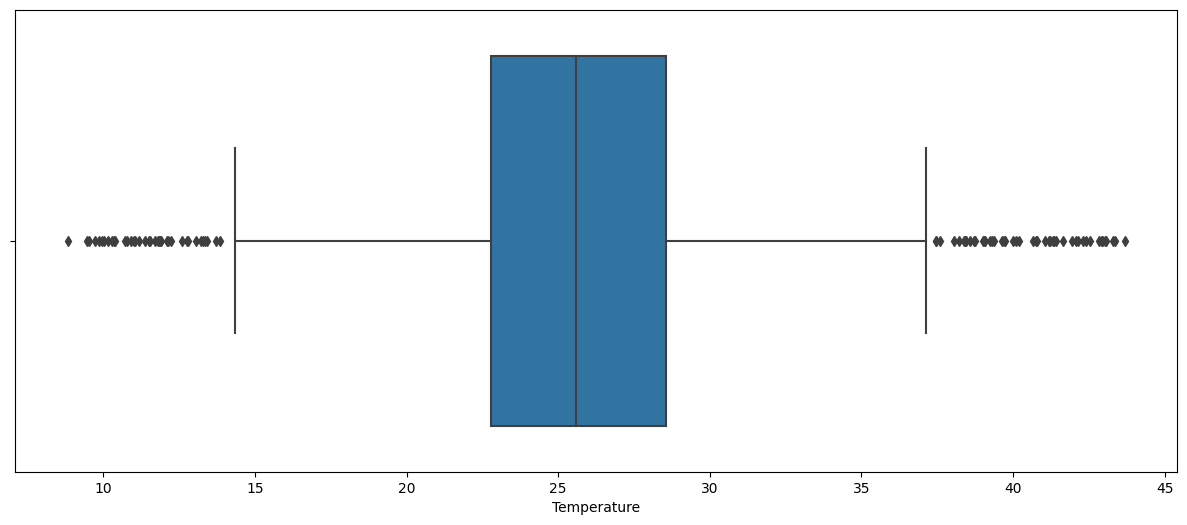

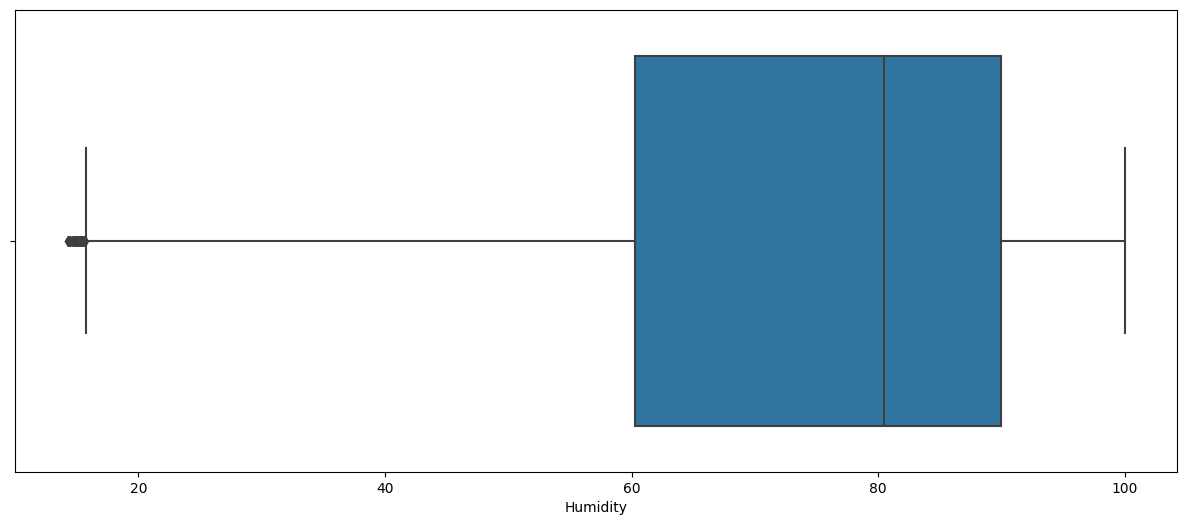

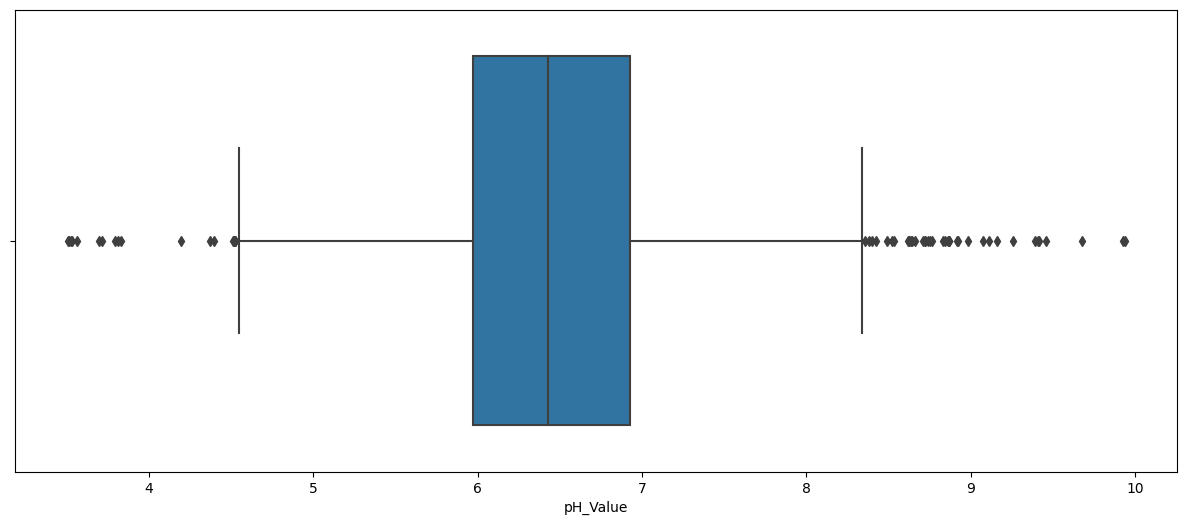

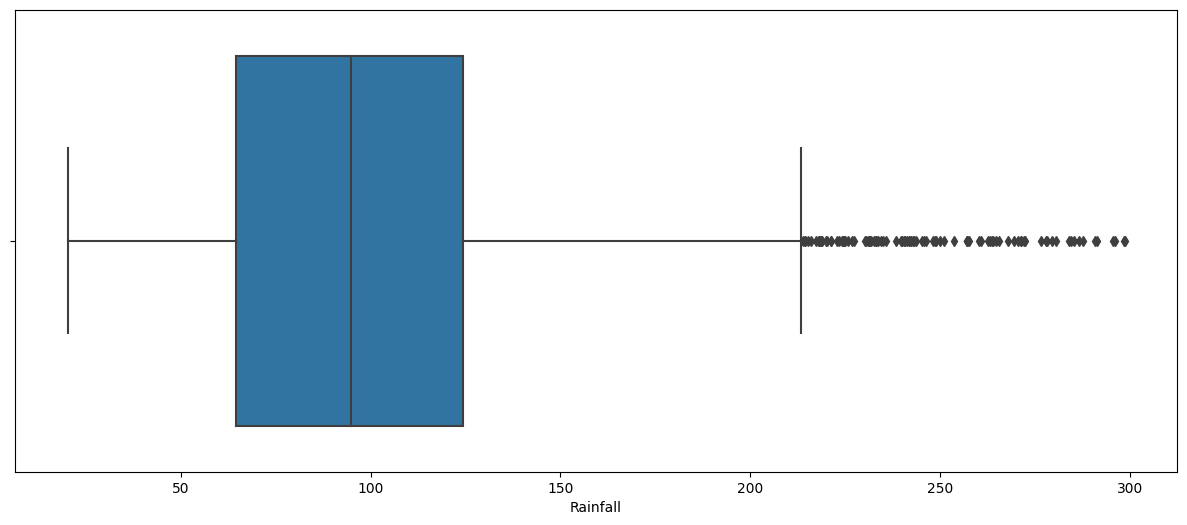

In [13]:
for i in df_no_y.columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=df_numeric[i])
    plt.show()

#### Barplot

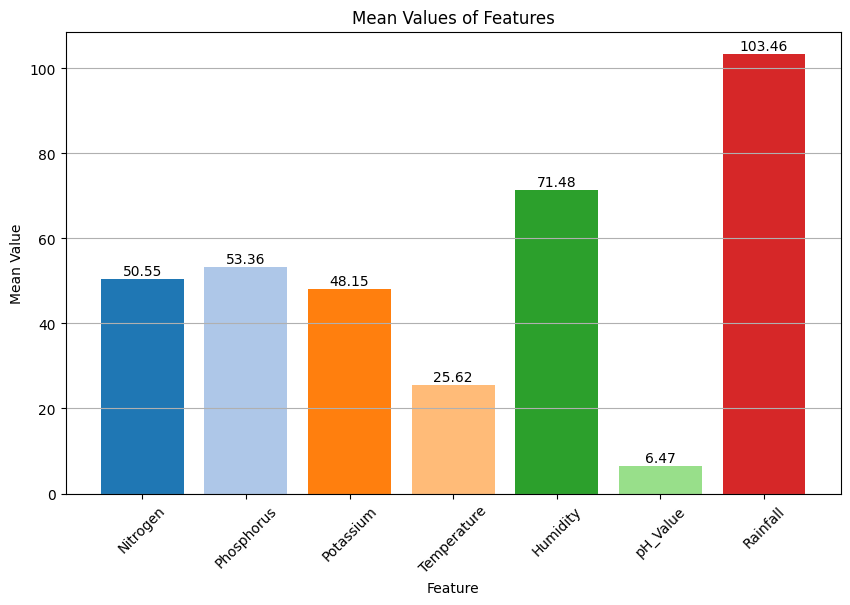

In [14]:
mean_values = df_no_y.mean()

# Plot the bar plot with different colors for each feature
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20.colors  # Get a list of colors from colormap

bars = plt.bar(mean_values.index, mean_values, color=colors[:len(mean_values)])
plt.title('Mean Values of Features')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.show()

#### Barplot

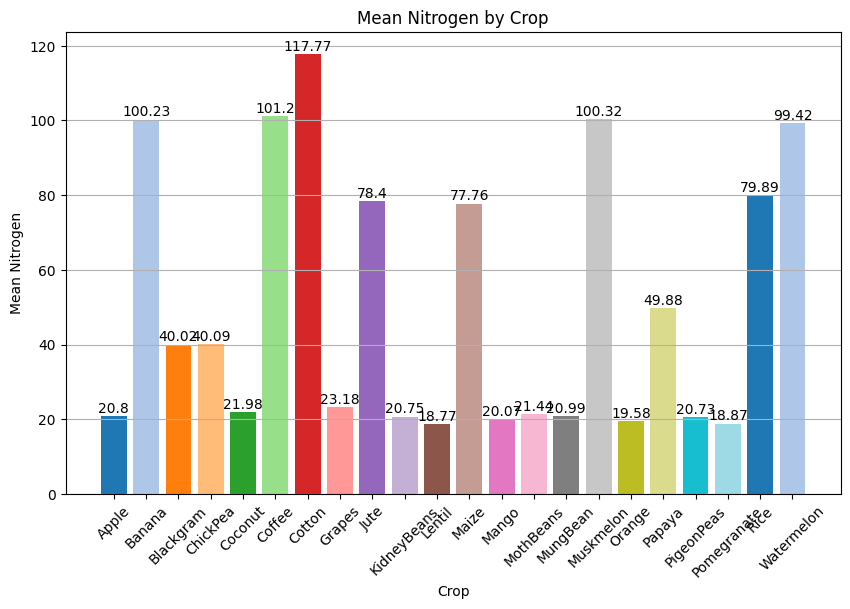

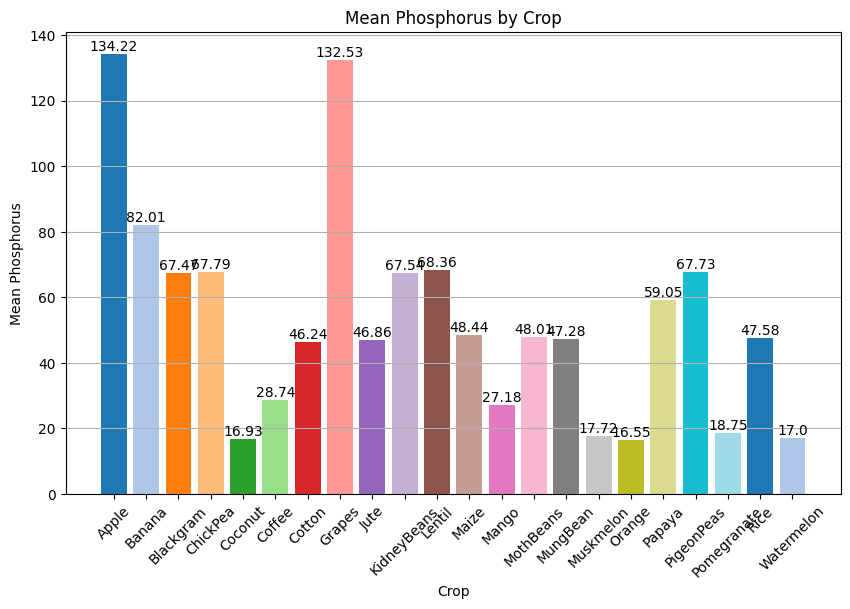

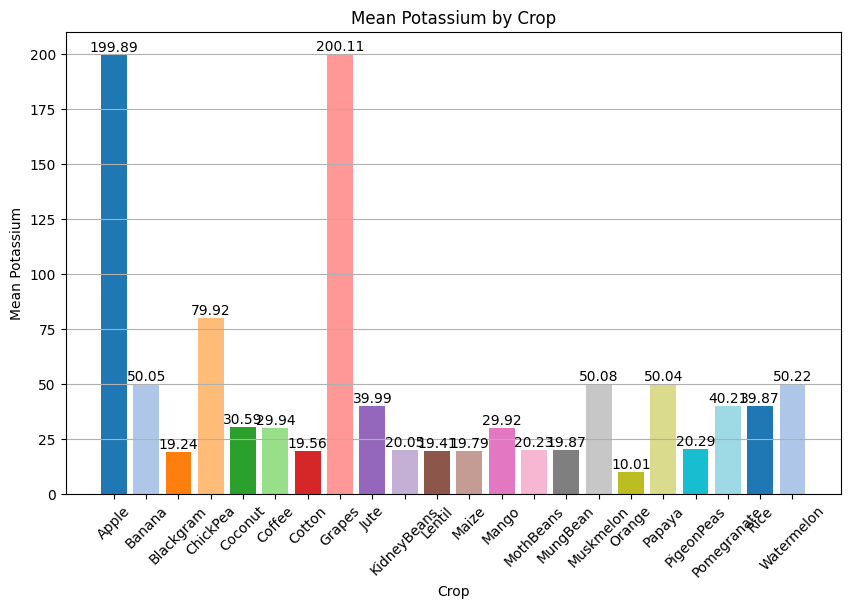

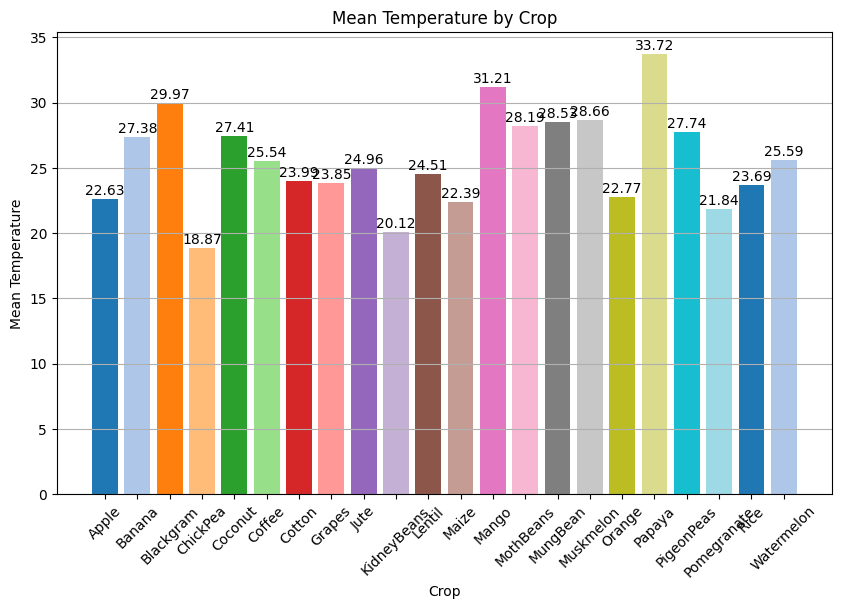

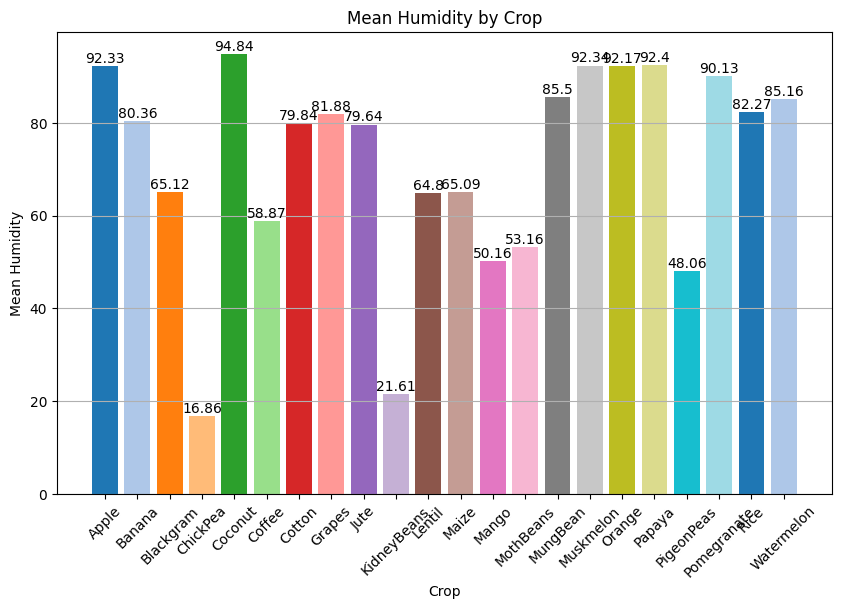

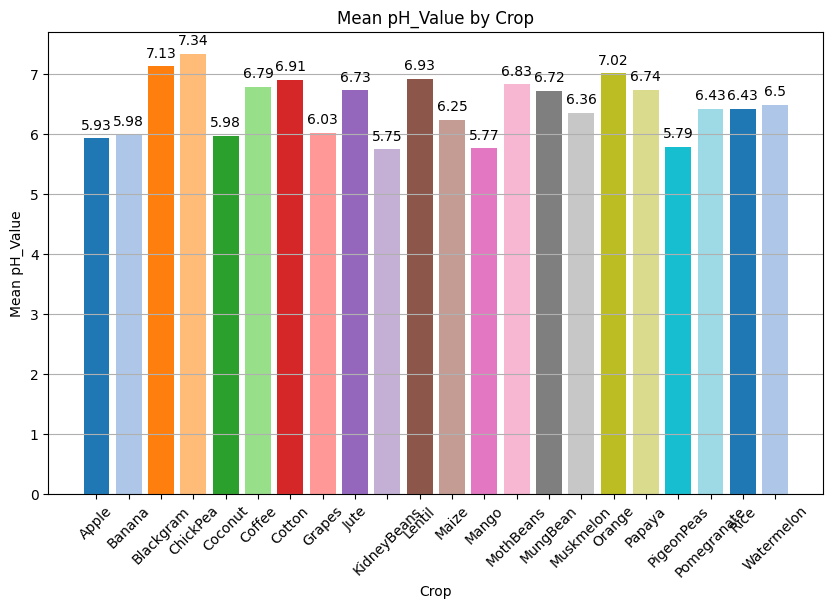

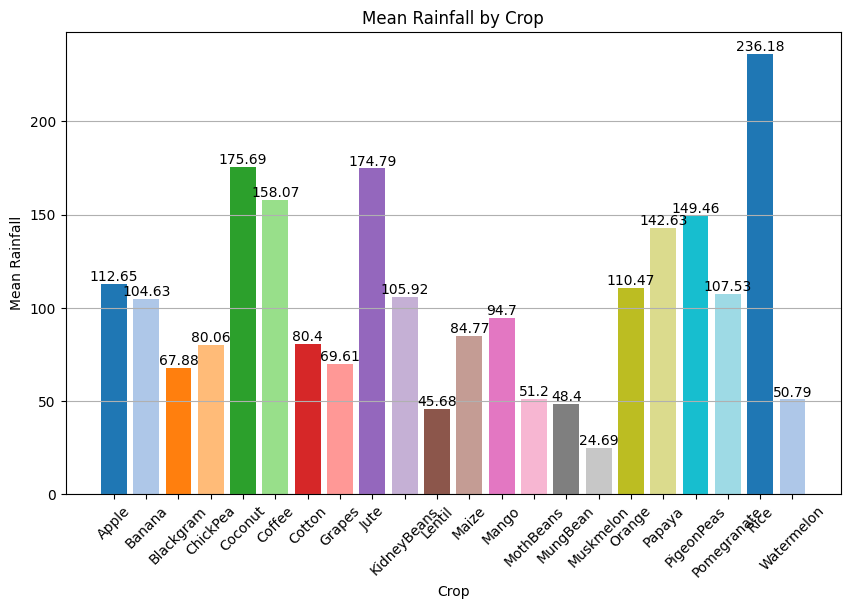

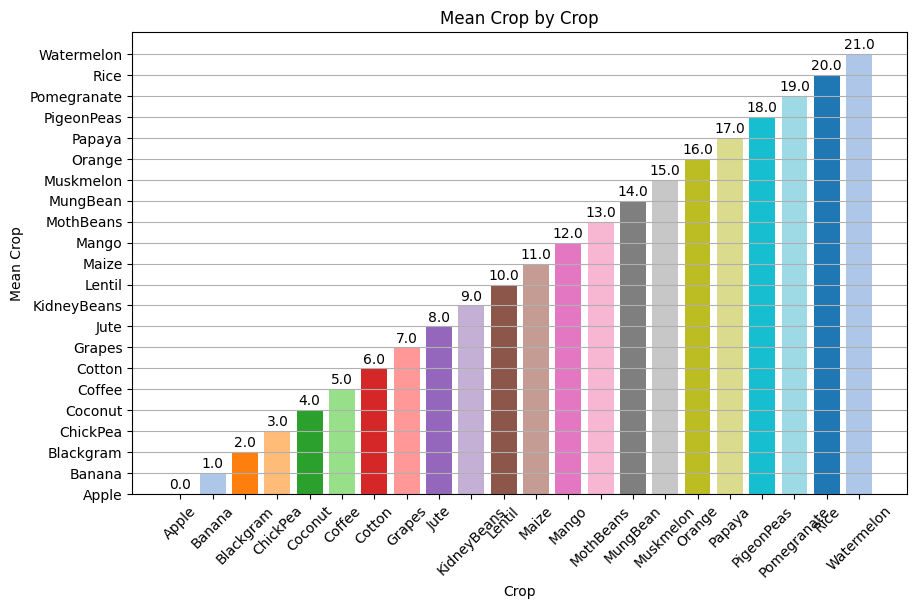

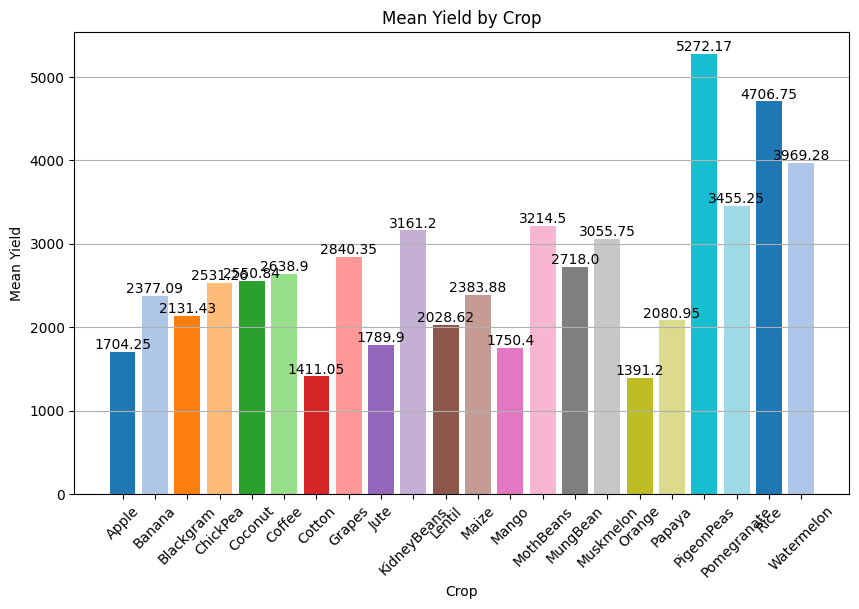

In [16]:
mean_values_by_crop = df.groupby('Crop').mean().reset_index()

# Plot the bar plots with different colors for each crop
colors = plt.cm.tab20.colors  # Get a list of colors from colormap

for feature in df.columns:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(mean_values_by_crop['Crop'], mean_values_by_crop[feature], color=colors[:len(mean_values_by_crop['Crop'])])
    plt.title(f'Mean {feature} by Crop')
    plt.xlabel('Crop')
    plt.ylabel(f'Mean {feature}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    # Add value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
    plt.show()

#### Correlation map

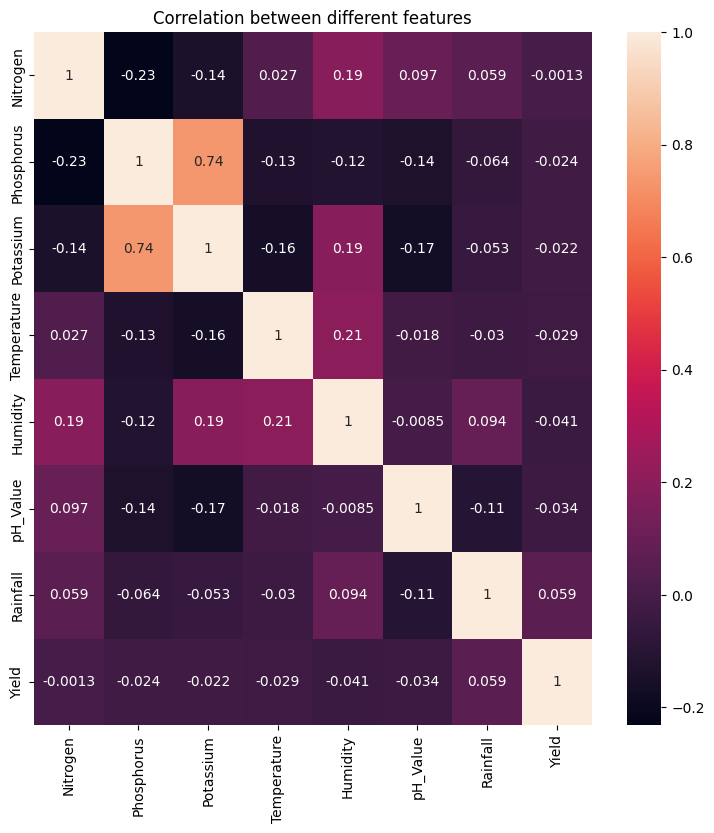

In [63]:
df_numeric.corr()
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
sns.heatmap(df_numeric.corr(), annot = True)
plt.title('Correlation between different features')
plt.show()

Correlation with Yield:

All features have very weak correlation with yield. The highest correlation is seen with Potassium (0.051), but even this value is very low. This suggests that none of the features have a strong linear relationship with yield.

Multicollinearity:

There is no significant multicollinearity between features. The highest correlation is between Nitrogen and Potassium (0.3), which is not strong enough to cause concern.

### Data preprocessing

#### convert categorical data to numerical data

In [64]:
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])

In [65]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,120000


#### Remove outliers

In [66]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [67]:
numerical_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
for column in numerical_columns:
    df = remove_outliers_iqr(df, column)
df = df.reset_index(drop=True)
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,5000
2,74,35,40,26.491096,80.158363,6.980401,242.864034,20,7000
3,94,53,40,20.277744,82.894086,5.718627,241.974195,20,6500
4,89,54,38,24.515881,83.535216,6.685346,230.446236,20,10000


In [68]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,5000
2,74,35,40,26.491096,80.158363,6.980401,242.864034,20,7000
3,94,53,40,20.277744,82.894086,5.718627,241.974195,20,6500
4,89,54,38,24.515881,83.535216,6.685346,230.446236,20,10000
...,...,...,...,...,...,...,...,...,...
1841,107,34,32,26.774637,66.413269,6.780064,177.774507,5,1000
1842,99,15,27,27.417112,56.636362,6.086922,127.924610,5,800
1843,118,33,30,24.131797,67.225123,6.362608,173.322839,5,560
1844,117,32,34,26.272418,52.127394,6.758793,127.175293,5,1500


#### Split the data

In [69]:
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall', 'Crop']]
y = df['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normalization

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Run the model (Compared three models)

* Linear Regression

In [71]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

* Decision Tree Regression

In [72]:
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, y_train)

DecisionTreeRegressor()

* SVM regression

In [73]:
model_SVC = SVR()
model_SVC.fit(X_train, y_train)

SVR()

### Evaluate the performance

In [74]:
def regression_evaluation_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R²):", r2)

* Linear Regression

In [75]:
y_pred = model_LR.predict(X_test)
regression_evaluation_metrics(y_test, y_pred)

Mean Absolute Error (MAE): 1802.3641876643046
Mean Squared Error (MSE): 8103351.693613596
Root Mean Squared Error (RMSE): 2846.6386657975395
R-squared (R²): -0.002829172028175675


* Decision Tree Regression

In [76]:
y_pred = model_DT.predict(X_test)
regression_evaluation_metrics(y_test, y_pred)

Mean Absolute Error (MAE): 2433.210810810811
Mean Squared Error (MSE): 18106327.84864865
Root Mean Squared Error (RMSE): 4255.153093444306
R-squared (R²): -1.240746107470731


* SVM Regression

In [77]:
y_pred = model_SVC.predict(X_test)
regression_evaluation_metrics(y_test, y_pred)

Mean Absolute Error (MAE): 1711.8906908249924
Mean Squared Error (MSE): 8960557.392526302
Root Mean Squared Error (RMSE): 2993.41901385795
R-squared (R²): -0.10891254515585969


### Conclusion


| Metric                       | Linear Regression | Decision Tree Regression | SVM Regression |
|------------------------------|-------------------|--------------------------|----------------|
| Mean Absolute Error (MAE)    | 1802.3642         | 2363.6811                | 1711.8907      |
| Mean Squared Error (MSE)     | 8103351.6936      | 15646045.9189            | 8960557.3925   |
| Root Mean Squared Error (RMSE)| 2846.6387        | 3955.5083                | 2993.4190      |
| R-squared (R²)               | -0.0028           | -0.9363                  | -0.1089        |


Linear Regression:

This model has the lowest Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) among the three models, indicating better performance in terms of prediction accuracy.
The R-squared (R²) value is slightly negative (-0.0028), suggesting that the model does not explain the variance in the target variable well and performs almost as poorly as a horizontal line (mean value of the target).

Decision Tree Regression:

This model has the highest errors (both MAE and RMSE) and a significantly negative R² value (-0.9363), indicating poor performance.
The high error values and the large negative R² suggest that the Decision Tree Regression model is not suitable for this dataset, possibly due to overfitting or the model's sensitivity to variations in the data.

SVM Regression:

This model performs better than the Decision Tree Regression but worse than the Linear Regression in terms of MAE and RMSE.
The R-squared (R²) value is also negative (-0.1089), indicating that the model does not explain the variance well but is slightly better than the Decision Tree Regression.

In summary, the Linear Regression model is the best among the three for this dataset in terms of prediction accuracy and error metrics. However, all models exhibit negative R² values, indicating that there may be room for improvement in model selection, feature engineering, or parameter tuning.